<a href="https://colab.research.google.com/github/rogersirius2023/Atvidades/blob/main/Semana4_27_05_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício


Neste exercício, tentaremos identificar diferentes `perfis de clientes` de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket`.

O dataset está disponível em [formato .csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) ou em [formato .xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Days_Registered`: Quantidade de Dias desde o cadastro

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário



**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


Obs: este dataset foi `adaptado` a partir do original encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [143]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Atividades Siruis/customer_supermarket.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Atividade 2: Faça o tratamento dos Dados.
Dica: verifique `dados ausentes` e `outliers` e, se necessário, remova as linhas.

In [144]:
# Avalianado todas as colunas 
pd.pandas.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [145]:
# Avaliação Geral 
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1976.805804,52247.251354,0.444196,0.506250,539.582143,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,202.122512,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1901.000000,1730.000000,0.000000,0.000000,186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1967.000000,35303.000000,0.000000,0.000000,366.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1978.000000,51381.500000,0.000000,0.000000,541.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1985.000000,68522.000000,1.000000,1.000000,715.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2004.000000,666666.000000,2.000000,2.000000,885.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [146]:
# Avaliando o máximo qual o Valor do Income descrepantes 


indice_max = df["Income"].idxmax()

indice_max

2233

In [147]:
# Removendo o Outlier

df.drop([2233], axis=0, inplace=True)

In [148]:
# Avaliando as condições das coluns no DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Days_Registered      2239 non-null   int64  
 9   Recency              2239 non-null   int64  
 10  MntWines             2239 non-null   int64  
 11  MntFruits            2239 non-null   int64  
 12  MntMeatProducts      2239 non-null   int64  
 13  MntFishProducts      2239 non-null   int64  
 14  MntSweetProducts     2239 non-null   int64  
 15  MntGoldProds         2239 non-null   i

In [149]:
#Avaliando as condições das colunas no DataFrame
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Days_Registered          int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [150]:
df.corr()

<ipython-input-150-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,-0.000334,0.000064,0.001861,-0.002090,-0.000341,-0.046070,-0.022426,0.004765,-0.004090,-0.024198,-0.007311,-0.013119,-0.037642,-0.018724,-0.003141,-0.014480,-0.007598,-0.035904,-0.025245,-0.007371,-0.021483,-0.015004,0.033945,NaN,NaN,-0.021754
Year_Birth,-0.000334,1.000000,-0.198064,0.229939,-0.351932,0.022375,-0.019601,-0.157548,-0.017825,-0.030677,-0.041467,-0.017943,-0.061642,-0.061127,-0.144941,-0.121122,-0.128044,0.121068,0.061868,-0.060430,0.007209,-0.005851,-0.006504,-0.030101,NaN,NaN,0.021456
Income,0.000064,-0.198064,1.000000,-0.514935,0.034363,-0.024126,0.006945,0.688269,0.507959,0.692465,0.520351,0.523746,0.389204,-0.108457,0.458812,0.696541,0.630397,-0.650564,-0.015286,0.219337,0.396571,0.327167,0.103909,-0.030583,NaN,NaN,0.161049
Kidhome,0.001861,0.229939,-0.514935,1.000000,-0.035720,-0.053444,0.009246,-0.496096,-0.372535,-0.436972,-0.387512,-0.370503,-0.349424,0.221488,-0.361566,-0.502131,-0.499488,0.447831,0.014807,-0.161511,-0.205557,-0.172261,-0.081682,0.040261,NaN,NaN,-0.079837
Teenhome,-0.002090,-0.351932,0.034363,-0.035720,1.000000,0.017547,0.015829,0.004484,-0.176930,-0.261510,-0.204465,-0.162783,-0.021986,0.388241,0.155373,-0.111034,0.050357,0.135029,-0.042802,0.038777,-0.191206,-0.140228,-0.015656,0.003098,NaN,NaN,-0.154655
Days_Registered,-0.000341,0.022375,-0.024126,-0.053444,0.017547,1.000000,0.024603,0.166368,0.066956,0.092779,0.080821,0.081329,0.159663,0.218517,0.191917,0.096254,0.110684,0.272432,-0.007689,0.018450,-0.005895,-0.039547,0.006074,0.033129,NaN,NaN,0.194525
Recency,-0.046070,-0.019601,0.006945,0.009246,0.015829,0.024603,1.000000,0.015716,-0.004431,0.022797,0.000861,0.022421,0.016450,-0.000749,-0.010886,0.024888,0.000453,-0.021335,-0.033110,0.018715,0.000016,-0.019392,-0.001829,0.013194,NaN,NaN,-0.198649
MntWines,-0.022426,-0.157548,0.688269,-0.496096,0.004484,0.166368,0.015716,1.000000,0.389591,0.562559,0.399636,0.386435,0.387374,0.011283,0.542223,0.635158,0.641980,-0.320603,0.062104,0.373246,0.472593,0.354097,0.205897,-0.039052,NaN,NaN,0.247143
MntFruits,0.004765,-0.017825,0.507959,-0.372535,-0.176930,0.066956,-0.004431,0.389591,1.000000,0.543078,0.594780,0.567139,0.392952,-0.132019,0.296697,0.487884,0.461725,-0.418360,0.014689,0.010113,0.215802,0.194719,-0.009790,-0.005180,NaN,NaN,0.125239
MntMeatProducts,-0.004090,-0.030677,0.692465,-0.436972,-0.261510,0.092779,0.022797,0.562559,0.543078,1.000000,0.568335,0.523758,0.350491,-0.122192,0.293685,0.723782,0.479531,-0.539449,0.018191,0.102840,0.373729,0.309718,0.043003,-0.023514,NaN,NaN,0.236244


### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [151]:
# Código exibirá o soma total
df['MntTotal'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] +df['MntWines'] + df['MntGoldProds']

df.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1445
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,25
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,665
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,43
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,376


### Atividade 4: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [152]:
# # para esse código ele deloca na seguintes seguencias coluna conforme exercício pede: Recency , Days_Registered , MntTotal , Income
df = df.loc[:,['Recency', 'Days_Registered','MntTotal','Income']]

df.head()

,Recency,Days_Registered,MntTotal,Income
0,58,849,1445,58138.0
1,38,299,25,46344.0
2,26,498,665,71613.0
3,26,325,43,26646.0
4,94,347,376,58293.0


### Atividade 5: Padronize os dados.

In [153]:
# separando as colunas de interesse
df2 = df[['Recency', 'Days_Registered','MntTotal','Income']]

# agrupando os dados por estado, agregando pela média
df2 = df2.groupby(by='Income').mean()

# transformando o índice (estados) em coluna novamente
df2 = df2.reset_index()
df2.head()

,Income,Recency,Days_Registered,MntTotal
0,1730.0,65.0,228.0,7.0
1,2447.0,42.0,725.0,1729.0
2,3502.0,56.0,628.0,5.0
3,4023.0,29.0,192.0,8.0
4,4428.0,0.0,453.0,357.0


In [173]:
# importando o scaler
from sklearn.preprocessing import StandardScaler

# instanciando o scaler
scaler = StandardScaler()

# criando uma cópia do DataFrame
df_scaled  = df2.copy()

# aplicando a padronização

df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)


df_scaled.head()




,Income,Recency,Days_Registered,MntTotal,grupos
0,-2.354212,0.552988,-1.537929,-0.994641,1.103982
1,-2.320831,-0.245285,0.932917,2.029556,-1.091740
2,-2.271714,0.240620,0.450679,-0.998153,0.006121
3,-2.247459,-0.696483,-1.716904,-0.992885,1.103982
4,-2.228603,-1.703001,-0.419337,-0.379967,1.103982


### Atividade 6: Faça um agrupamento hierárquico e plote o dendograma.

In [155]:
# importando funções para plotar o dendograma
from scipy.cluster.hierarchy import linkage, dendrogram

In [156]:
distancias = linkage(df_scaled[['Days_Registered','MntTotal','Income','Recency']],
                     method='ward',
                     metric='euclidean')

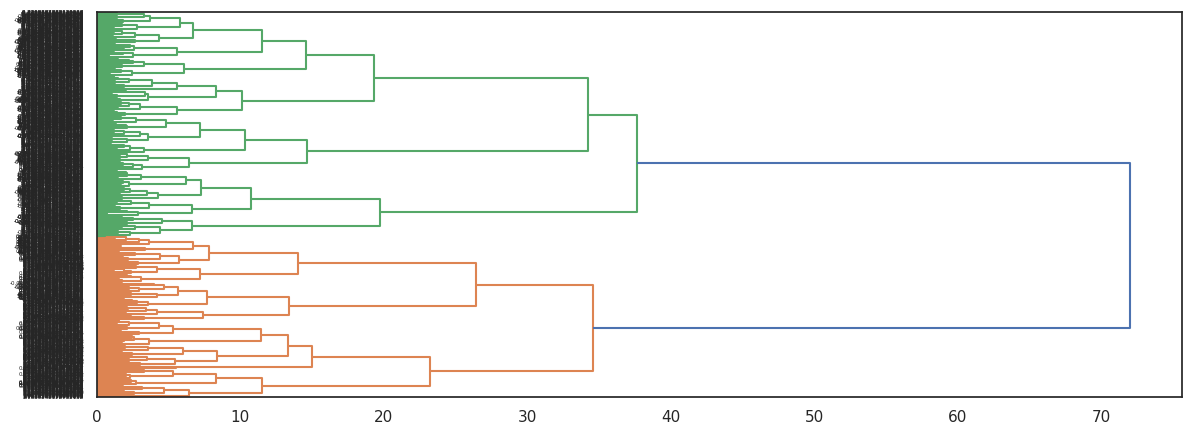

In [157]:
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(14,5)})

dn = dendrogram(distancias,
                leaf_font_size=4,
                orientation='right',
                labels=df_scaled['Income'].values)

### Atividade 7: Encontre a quantidade que parece adequada para o número de grupos.
Dicas:
* Faça a análise a partir do dendrograma acima, escolha uma quantidade de clusters que parecer adequada e crie uma coluna com o nome `grupos` no dataframe.
* Adicione a coluna `grupos` ao dataframe contendo todas as variáveis (e não somente aquelas utilizadas para os agrupamentos), assim você poderá fazer uma análise mais ampla dos consumidores.
* Para o propósito deste exercício, utilize um `máximo` de 4 grupos para permitir uma boa visualização nas etapas a seguir.

In [158]:
# importando a função fcluster
from scipy.cluster.hierarchy import fcluster

# distância máxima
max_d = 3

# obtendo grupos levando em consideração a distância
grupos = fcluster(distancias, t=max_d, criterion='maxclust')

df2['grupos'] = grupos

df.head()

,Recency,Days_Registered,MntTotal,Income
0,58,849,1445,58138.0
1,38,299,25,46344.0
2,26,498,665,71613.0
3,26,325,43,26646.0
4,94,347,376,58293.0


In [159]:
df2['grupos'] = grupos
df2.head()


,Income,Recency,Days_Registered,MntTotal,grupos
0,1730.0,65.0,228.0,7.0,3
1,2447.0,42.0,725.0,1729.0,1
2,3502.0,56.0,628.0,5.0,2
3,4023.0,29.0,192.0,8.0,3
4,4428.0,0.0,453.0,357.0,3


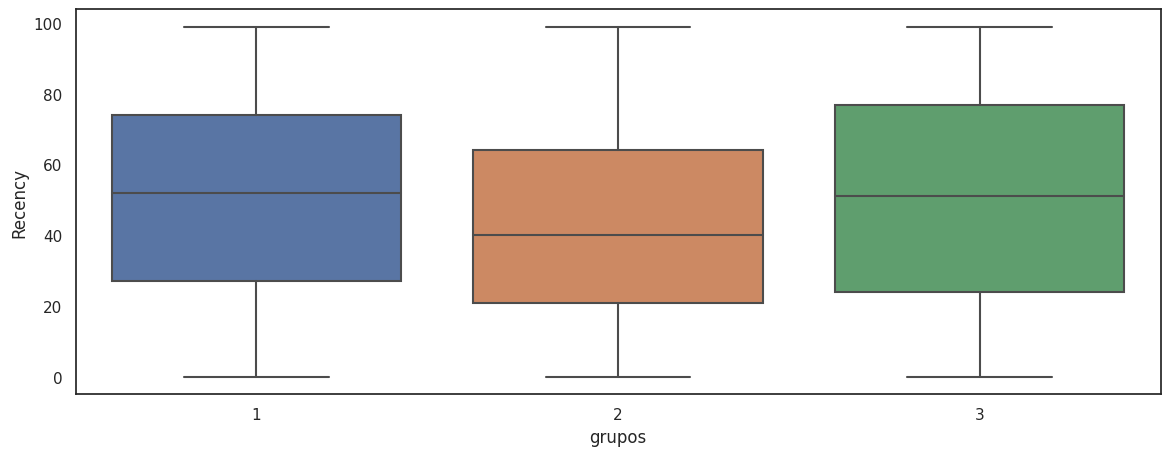

In [160]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# boxplot da variável Recency
sns.boxplot(data=df2, x='grupos', y='Recency');

In [161]:
# observado o DataFrame
df2

,Income,Recency,Days_Registered,MntTotal,grupos
0,1730.0,65.0,228.0,7.0,3
1,2447.0,42.0,725.0,1729.0,1
2,3502.0,56.0,628.0,5.0,2
3,4023.0,29.0,192.0,8.0,3
4,4428.0,0.0,453.0,357.0,3
...,...,...,...,...,...
1968,157146.0,13.0,612.0,1728.0,1
1969,157243.0,98.0,306.0,1607.0,1
1970,157733.0,37.0,576.0,57.0,1
1971,160803.0,21.0,880.0,1700.0,1


### Atividade 8: Crie Gráficos para visualizar os Grupos.

#### Atividade 8.1: Crie Visualizações em Boxplot
Dica: utilize o Seaborn para criar boxplots com os clusters selecionados.

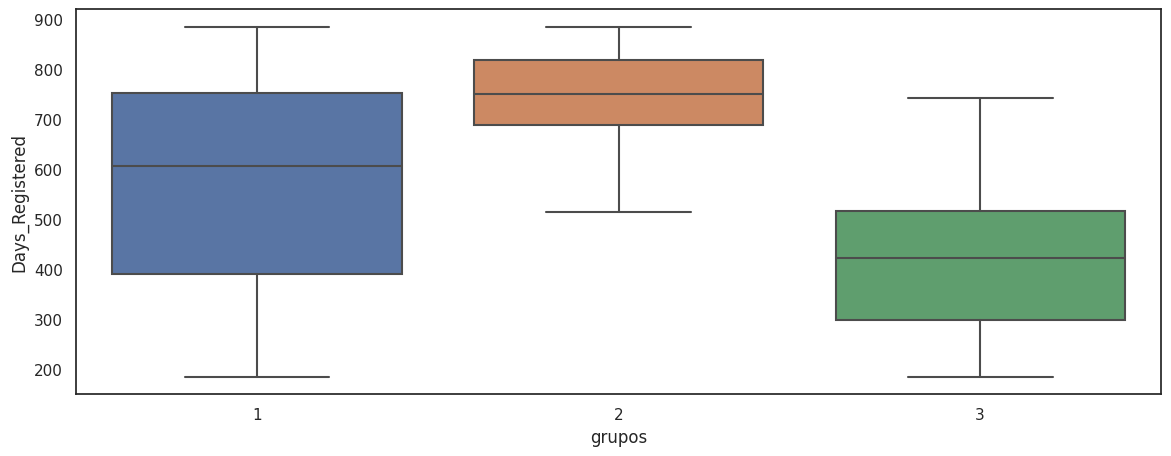

In [162]:
# boxplot da variável Days_Registered
sns.boxplot(data=df2, x='grupos', y='Days_Registered');

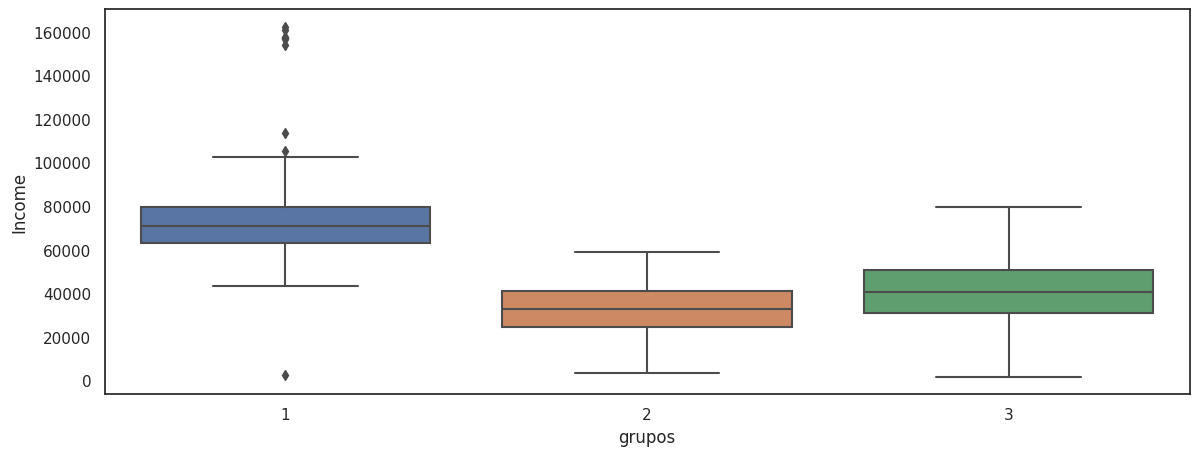

In [163]:
# boxplot da variável Income
sns.boxplot(data=df2, x='grupos', y='Income');

#### Atividade 8.2: Crie Histogramas para visualizar os Grupos
Dica: utilize o Seaborn para plotar histogramas dos clusters selecionados.

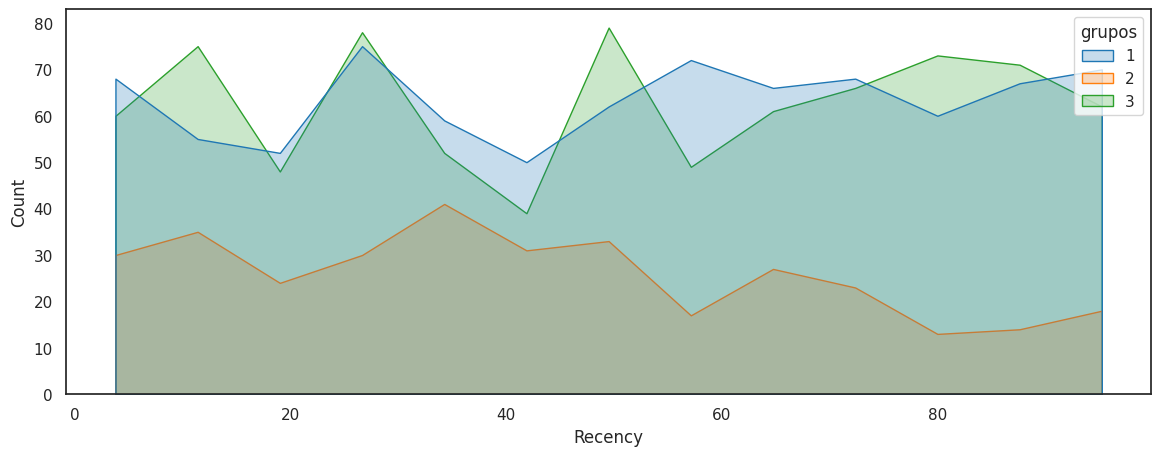

In [164]:
# histograma da variável Recency
sns.histplot(data=df2, x='Recency', hue='grupos', element='poly', palette='tab10');

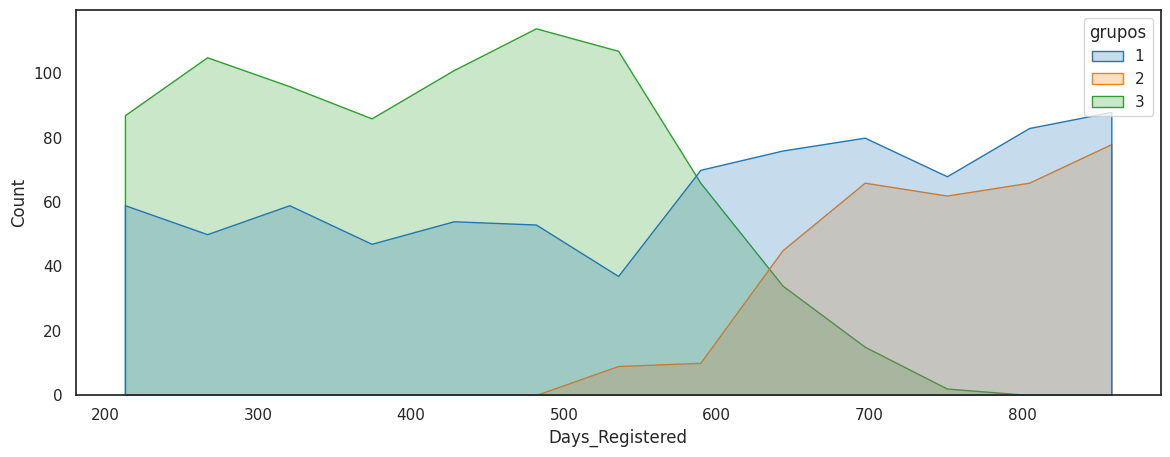

In [165]:
# histograma da variável Days_Registered
sns.histplot(data=df2, x='Days_Registered', hue='grupos', element='poly', palette='tab10');

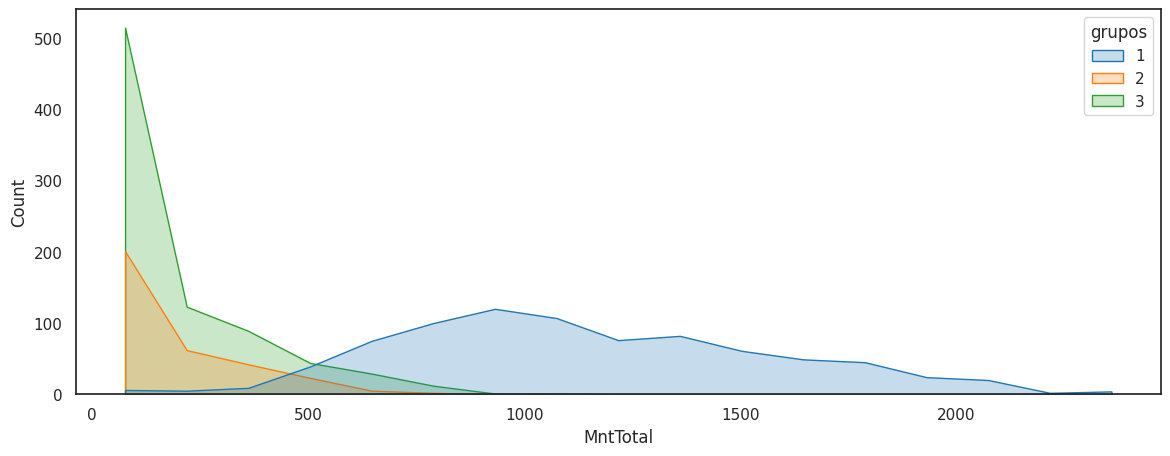

In [166]:
# histograma da variável MntTotal
sns.histplot(data=df2, x='MntTotal', hue='grupos', element='poly', palette='tab10');

### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

In [167]:
# adicionando a coluna com os grupos
df2

,Income,Recency,Days_Registered,MntTotal,grupos
0,1730.0,65.0,228.0,7.0,3
1,2447.0,42.0,725.0,1729.0,1
2,3502.0,56.0,628.0,5.0,2
3,4023.0,29.0,192.0,8.0,3
4,4428.0,0.0,453.0,357.0,3
...,...,...,...,...,...
1968,157146.0,13.0,612.0,1728.0,1
1969,157243.0,98.0,306.0,1607.0,1
1970,157733.0,37.0,576.0,57.0,1
1971,160803.0,21.0,880.0,1700.0,1


Descrição dos Grupos:

* O grupo 1 é composto por pessoas que [...].

* O grupo 2 é composto por pessoas que [...].

* O grupo (n) é composto por pessoas que [...].

In [168]:
# separando os grupos
grupo1 = df2[df2['grupos'] == 1]
grupo2 = df2[df2['grupos'] == 2]
grupo3 = df2[df2['grupos'] == 3]

In [169]:
# estatísticas descritivas do grupo 1
grupo1.describe()

,Income,Recency,Days_Registered,MntTotal,grupos
count,824.000000,824.000000,824.000000,824.000000,824.0
mean,71775.865291,50.504045,570.591019,1137.181230,1.0
std,13918.309807,28.806767,206.783128,430.245282,0.0
min,2447.000000,0.000000,186.000000,5.000000,1.0
25%,63206.750000,27.000000,391.750000,822.000000,1.0
50%,70961.000000,52.000000,606.000000,1080.000000,1.0
75%,79529.250000,74.000000,751.875000,1431.250000,1.0
max,162397.000000,99.000000,884.000000,2431.000000,1.0


In [170]:
# estatísticas descritivas do grupo 2
grupo2.describe()

,Income,Recency,Days_Registered,MntTotal,grupos
count,336.000000,336.000000,336.000000,336.000000,336.0
mean,32649.184524,43.088542,750.639137,171.773313,2.0
std,11298.722155,26.792768,84.257673,169.499085,0.0
min,3502.000000,0.000000,516.000000,5.000000,2.0
25%,24460.250000,21.000000,688.000000,42.750000,2.0
50%,32965.500000,40.000000,751.500000,94.000000,2.0
75%,40889.000000,64.000000,819.000000,264.500000,2.0
max,58917.000000,99.000000,885.000000,1010.000000,2.0


In [171]:
# estatísticas descritivas do grupo 2
grupo3.describe()

,Income,Recency,Days_Registered,MntTotal,grupos
count,813.000000,813.000000,813.000000,813.000000,813.0
mean,40674.761378,50.081796,415.504920,167.869619,3.0
std,13856.257804,29.358742,131.267632,185.418930,0.0
min,1730.000000,0.000000,186.000000,5.000000,3.0
25%,30772.000000,24.000000,299.000000,39.000000,3.0
50%,40590.000000,51.000000,424.000000,72.000000,3.0
75%,50520.000000,77.000000,518.000000,256.000000,3.0
max,79761.000000,99.000000,742.000000,965.000000,3.0


### Para refletir: 


####Quais outras variáveis poderíamos combinar ou processar para obter análises mais precisas?

Exemplo: e se comparássemos o valor gasto com a faixa de salário para entender esses valores percentualmente?

####Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot Encoding